In diesem Abschnitt sollen nun die Titel der getrendeten Youtube Videos anhand der Merkmale Länge der Titel, Anteil der Großbuchstaben sowie Anteil der Emojies genauer untersucht werden. Im Anschluss daran sollen anhand eines ...-Modells Vorhersagen getroffen werden wie ein Titel anhand der genannten Merkmale positiven bzw. negativen Einfluss generieren kann. 

Zunächst werden wie zuvor die Bibliotheken "NumPy", die Grundlage für wissenschaftliche Berechnungen in Python, und "Pandas", eine Programmbibliothek zur Verabeitung von Daten, importiert. 
Darüber hinaus werden in diesem Abschnitt mit Hilfe von Regex die Titel analysiert.


In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data_once

In [3]:
#Analyse der Titel -> nochmal nachschauen wie NLP genau funktioniert
title_df = data_once.loc[:, ("video_id", "title")]

title_df["title_words_list"]=title_df["title"].str.split(" ", expand = False)
title_df["num_title_words"]=title_df["title_words_list"].str.len()

In [4]:
mean_title_len = title_df["num_title_words"].mean()
mean_title_len

9.493763806287172

In [67]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29425 entries, 0 to 29424
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   video_id          29425 non-null  object
 1   title             29425 non-null  object
 2   title_words_list  29425 non-null  object
 3   num_title_words   29425 non-null  int64 
 4   emoji             1190 non-null   object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [5]:
title_df.head()

,video_id,title,title_words_list,num_title_words
0,--7vNbh4UNA,"Responding to ALL The Outrage, Ridiculous H3H3...","[Responding, to, ALL, The, Outrage,, Ridiculou...",11
1,--I0aj8MUdU,E diela shqiptare - Ka nje mesazh per ty! (04 ...,"[E, diela, shqiptare, -, Ka, nje, mesazh, per,...",12
2,--MtKsH5oBY,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,"[صحفي, بين, سبورت, يكشف, تفاصيل, و, كواليس, اس...",13
3,--moh3hSPpY,Te vreau langa mine! (02.01.2018) - Editie COM...,"[Te, vreau, langa, mine!, (02.01.2018), -, Edi...",8
4,--rE6D0_jAw,HÖR AUF DAS SCHLECHTE ZU SEHEN!,"[HÖR, AUF, DAS, SCHLECHTE, ZU, SEHEN!]",6


Anteil Emoji in Titel und dessen Einfluss

In [6]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [7]:
title_df['emoji'] = None
index_title = title_df.columns.get_loc('title')
index_emoji = title_df.columns.get_loc('emoji')

In [8]:
def getEmojies(content, row):
    #for element in content.loc[row, 'title']:
        emo = re.search(emoji_pattern, content.iat[row, index_title])    
        if emo is None:
            return None
        content.iat[row, index_emoji] = emo.group()

for row in range(0, len(title_df)):
    getEmojies(title_df, row)

In [28]:
only_emoji_df = title_df.loc[:, ("video_id", "title", "emoji")]
only_emoji_df["num_emoji"] = only_emoji_df["emoji"].str.len()
only_emoji_df["num_emoji"].fillna(0, inplace = True)
only_emoji_df['num_emoji'] = only_emoji_df['num_emoji'].apply(np.int64)
only_emoji_df['emoji_flag'] = np.where(only_emoji_df['num_emoji']!= 0, True, False)

In [39]:
only_emoji_df['num_emoji'].mean()

0.05784197111299915

In [29]:
only_emoji_df.head(49)

,video_id,title,emoji,num_emoji,emoji_flag
0,--7vNbh4UNA,"Responding to ALL The Outrage, Ridiculous H3H3...",None,0,False
1,--I0aj8MUdU,E diela shqiptare - Ka nje mesazh per ty! (04 ...,None,0,False
2,--MtKsH5oBY,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,None,0,False
3,--moh3hSPpY,Te vreau langa mine! (02.01.2018) - Editie COM...,None,0,False
4,--rE6D0_jAw,HÖR AUF DAS SCHLECHTE ZU SEHEN!,None,0,False
5,--znlYcDEfI,Familja 6 anetareshe e Halit Fazliu nga Dumnic...,None,0,False
6,-0-KcJkKjqA,MrGamerPros Mercedes CLA Tuning by BBM,None,0,False
7,-01JK3TRtIo,Çocuklar Duymasın | 18.Bölüm 1.Fragman,None,0,False
8,-06RYo6s6qQ,Wie du eine KAPUTTE Beziehung REPARIERST,None,0,False
9,-0H6tlSzP9M,"Mamoudou Gassama, le Malien ayant sauvé un enf...",None,0,False


Top value: 29646.7
Lowest value: -1410.7


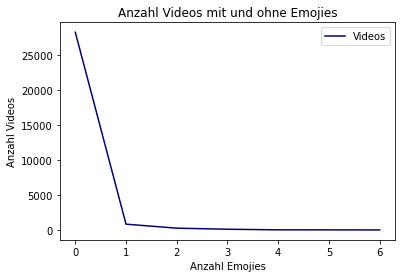

In [71]:
groups_emoji = only_emoji_df.groupby('num_emoji').count()
exclude = ['video_id','emoji','emoji_flag']
graph = groups_emoji.loc[:, groups_emoji.columns.difference(exclude)].plot(colormap = 'jet', 
                                                                   title='Anzahl Videos mit und ohne Emojies')
graph.set_xlabel("Anzahl Emojies")
graph.set_ylabel("Anzahl Videos")
graph.legend(["Videos"])
bottom,top= plt.ylim()  ##???

print("Top value:",top)
print("Lowest value:", bottom)

Top value: 29646.75
Lowest value: 0.0


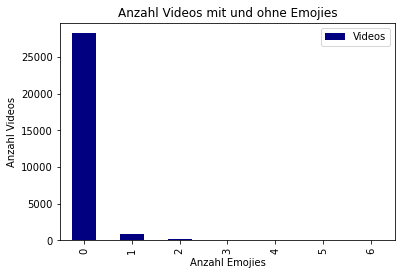

In [70]:
groups_emoji = only_emoji_df.groupby('num_emoji').count()
exclude = ['video_id','emoji','emoji_flag']
graph2 = groups_emoji.loc[:, groups_emoji.columns.difference(exclude)].plot(kind = 'bar', colormap = 'jet', 
                                                                   title='Anzahl Videos mit und ohne Emojies') 
graph2.set_xlabel("Anzahl Emojies")
graph2.set_ylabel("Anzahl Videos")
graph2.legend(["Videos"])
bottom,top= plt.ylim()  ##???

print("Top value:",top)
print("Lowest value:", bottom)

In [62]:
df=pd.merge(title_df, only_emoji_df.iloc[:, [0,3,4]], how ='left', on='video_id')

In [61]:
df2 =pd.merge(df, data_once.iloc[:,[0,8,9,10,16]], how ='left', on='video_id')

(0.0, 1000000.0)

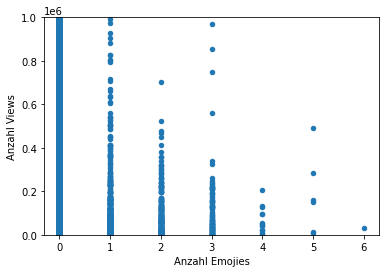

In [65]:
graph3 = df2.plot.scatter(x="num_emoji", y="views")
graph3.set_xlabel("Anzahl Emojies")
graph3.set_ylabel("Anzahl Views")
graph3.set_ylim([0, 1000000])
#hier noch iwi auf durschnittlichen Views runterbrechen - weiß nicht ob die Aussage so von Wert ist mit dem plot unten

Plan: 

-> wie verhalten sich Clickzahl zu Emojies
-> Wie verhalten sich Emojies zu Kategorien

In [63]:
data_once.head()

,video_id,trending_date,latest_trending_date,latest_trending_date_x,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,latest_trending_date_y
0,--7vNbh4UNA,18.14.04,18.14.04,18.14.04,"Responding to ALL The Outrage, Ridiculous H3H3...",Philip DeFranco,2018-04-13T19:00:00.000Z,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...",1082647,52113,1284,10602,False,False,False,"Thanks for tuning in this week, ya Beautiful B...",News & Politics,18.14.04
1,--I0aj8MUdU,18.06.02,18.06.02,18.06.02,E diela shqiptare - Ka nje mesazh per ty! (04 ...,RTV KLAN,2018-02-04T13:19:38.000Z,"tv klan|""televizioni klan""|""klanhd""|""ardit gje...",139025,490,78,22,False,False,False,Facebook: https://www.facebook.com/tvklan Talk...,Entertainment,18.06.02
2,--MtKsH5oBY,18.31.05,18.31.05,18.31.05,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,RedsTech,2018-05-31T12:40:46.000Z,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",225445,2156,227,562,False,False,False,I للتواصل معنا Ihttps://www.facebook.com/RedsT...,Sports,18.31.05
3,--moh3hSPpY,18.03.01,18.03.01,18.03.01,Te vreau langa mine! (02.01.2018) - Editie COM...,Kanal D Romania,2018-01-02T13:30:00.000Z,"te vreau langa mine|""kanal d""|""kanal d romania...",17050,100,32,74,False,False,False,Te vreau langa mine! (02.01.2018) - Editie COM...,Entertainment,18.03.01
4,--rE6D0_jAw,18.30.04,18.30.04,18.30.04,HÖR AUF DAS SCHLECHTE ZU SEHEN!,Biyon,2018-04-29T14:35:57.000Z,"Motivation|""Positivität""|""Erfolg""|""Selbstbewus...",5406,964,4,191,False,False,False,"▶︎ Wie du vielleicht mitbekommen hast, ist mei...",Entertainment,18.30.04
